# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [96]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [97]:
# visualização das colunas com dados numéricos
sinasc_raw.select_dtypes('number').columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES', 'CONSULTAS',
       'HORANASC', 'APGAR1', 'APGAR5', 'PESO', 'IDANOMAL', 'NUMEROLOTE',
       'DIFDATA', 'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU',
       'ESCMAE2010', 'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT',
       'QTDPARTNOR', 'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC',
       'TPMETESTIM', 'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART',
       'STCESPARTO', 'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC',
       'ESCMAEAGR1', 'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON',
       'PARIDADE', 'KOTELCHUCK', 'CONTADOR', 'munResLat', 'munResLon',
       'munResAlt', 'munResArea'],
      dtype='object')

In [98]:
sinasc_raw['Latitude'] = pd.cut(sinasc_raw['munResLat'], bins=[-float('inf'), -10.5, float('inf')],
                         labels=['menor que -10.5', 'maior que -10.5'])

In [99]:
sinasc_raw.groupby('Latitude')['ORIGEM'].agg(['sum', 'mean', 'median',
                                              'max', 'min'])

,sum,mean,median,max,min
Latitude,,,,,
menor que -10.5,12993,1.0,1.0,1,1
maior que -10.5,14034,1.0,1.0,1,1


In [100]:
# cálculo do variância
sinasc_raw.groupby('Latitude')['ORIGEM'].var(ddof=0)

Latitude
menor que -10.5    0.0
maior que -10.5    0.0
Name: ORIGEM, dtype: float64

In [101]:
# cálculo do desvio padrão
sinasc_raw.groupby('Latitude')['ORIGEM'].std(ddof=0)

Latitude
menor que -10.5    0.0
maior que -10.5    0.0
Name: ORIGEM, dtype: float64

In [102]:
sinasc_raw.groupby('Latitude')['IDADEMAE'].agg(['sum', 'mean', 'median',
                                                'max', 'min'])

,sum,mean,median,max,min
Latitude,,,,,
menor que -10.5,340143,26.178943,26.0,53,12
maior que -10.5,365094,26.014964,25.0,52,11


In [103]:
# cálculo da variância
sinasc_raw.groupby('Latitude')['IDADEMAE'].var(ddof=0)

Latitude
menor que -10.5    39.944198
maior que -10.5    41.569393
Name: IDADEMAE, dtype: float64

In [104]:
# cálculo do desvio padrão
sinasc_raw.groupby('Latitude')['IDADEMAE'].std(ddof=0)

Latitude
menor que -10.5    6.320142
maior que -10.5    6.447433
Name: IDADEMAE, dtype: float64

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [105]:
sinasc_raw['area_3000'] = pd.cut(sinasc_raw['munResArea'], bins=[-float('inf'), 3000, float('inf')],
                        labels=['abaixo de 3000', 'acima de 3000'])

In [106]:
sinasc_raw.groupby('area_3000')['APGAR5'].agg(['sum', 'mean', 'median',
                                             'max', 'min'])

,sum,mean,median,max,min
area_3000,,,,,
abaixo de 3000,47560.0,9.130351,9.0,10.0,0.0
acima de 3000,199579.0,9.190836,9.0,10.0,0.0


In [107]:
# cálculo da variância
sinasc_raw.groupby('area_3000')['APGAR5'].var(ddof=0)

area_3000
abaixo de 3000    0.641676
acima de 3000     0.620271
Name: APGAR5, dtype: float64

In [108]:
# cálculo do desvio padrão
sinasc_raw.groupby('area_3000')['APGAR5'].std(ddof=0)

area_3000
abaixo de 3000    0.801047
acima de 3000     0.787573
Name: APGAR5, dtype: float64

In [109]:
sinasc_raw.groupby('area_3000')['IDADEPAI'].agg(['sum', 'mean', 'median',
                                             'max', 'min'])

,sum,mean,median,max,min
area_3000,,,,,
abaixo de 3000,78074.0,31.092792,30.0,69.0,16.0
acima de 3000,158424.0,31.094014,30.0,86.0,15.0


In [110]:
# cálculo da variância
sinasc_raw.groupby('area_3000')['IDADEPAI'].var(ddof=0)

area_3000
abaixo de 3000    58.889438
acima de 3000     61.114812
Name: IDADEPAI, dtype: float64

In [111]:
# cálculo do desvio padrão
sinasc_raw.groupby('area_3000')['IDADEPAI'].std(ddof=0)

area_3000
abaixo de 3000    7.673945
acima de 3000     7.817596
Name: IDADEPAI, dtype: float64

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [112]:
sinasc_raw['altitude_20'] = pd.cut(sinasc_raw['munResAlt'], bins=[-float('inf'), -20, float('inf')],
                        labels=['abaixo de -20', 'acima de -20'])

In [113]:
sinasc_raw.groupby('altitude_20')['QTDPARTNOR'].agg(['sum', 'mean', 'median',
                                             'max', 'min'])

,sum,mean,median,max,min
altitude_20,,,,,
abaixo de -20,0.0,NaN,NaN,NaN,NaN
acima de -20,14571.0,0.57941,0.0,41.0,0.0


In [114]:
# cálculo da variância 
sinasc_raw.groupby('altitude_20')['QTDPARTNOR'].var(ddof=0)

altitude_20
abaixo de -20         NaN
acima de -20     1.462002
Name: QTDPARTNOR, dtype: float64

In [115]:
# cálculo do desvio padrão 
sinasc_raw.groupby('altitude_20')['QTDPARTNOR'].std(ddof=0)

altitude_20
abaixo de -20         NaN
acima de -20     1.209133
Name: QTDPARTNOR, dtype: float64

In [116]:
sinasc_raw.groupby('altitude_20')['QTDFILVIVO'].agg(['sum', 'mean', 'median',
                                             'max', 'min'])

,sum,mean,median,max,min
altitude_20,,,,,
abaixo de -20,0.0,NaN,NaN,NaN,NaN
acima de -20,26826.0,1.053901,1.0,30.0,0.0


In [117]:
# cálculo da variância 
sinasc_raw.groupby('altitude_20')['QTDFILVIVO'].var(ddof=0)

altitude_20
abaixo de -20         NaN
acima de -20     1.370946
Name: QTDFILVIVO, dtype: float64

In [118]:
# cálculo do desvio padrão 
sinasc_raw.groupby('altitude_20')['QTDFILVIVO'].std(ddof=0)

altitude_20
abaixo de -20         NaN
acima de -20     1.170874
Name: QTDFILVIVO, dtype: float64

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [119]:
sinasc_raw['munResNome'].value_counts()

munResNome
Porto Velho                  8437
Ji-Paraná                    2182
Ariquemes                    1729
Vilhena                      1590
Cacoal                       1374
Rolim de Moura                927
Jaru                          881
Guajará-Mirim                 781
Ouro Preto do Oeste           631
Pimenta Bueno                 616
Buritis                       583
Machadinho D'Oeste            500
Espigão D'Oeste               450
Nova Mamoré                   432
Alta Floresta D'Oeste         367
São Miguel do Guaporé         353
Candeias do Jamari            337
Presidente Médici             304
São Francisco do Guaporé      303
Nova Brasilândia D'Oeste      261
Cerejeiras                    237
Costa Marques                 233
Alto Paraíso                  226
Colorado do Oeste             214
Alvorada D'Oeste              205
Cujubim                       205
Monte Negro                   199
Urupá                         170
Seringueiras                  168
Cam

In [120]:
imediatas = {
    'Candeias do Jamari': 'Porto Velho',
    'Guajará-Mirim': 'Porto Velho',
    'Itapuã do Oeste': 'Porto Velho',
    'Nova Mamoré': 'Porto Velho',
    'Porto Velho': 'Porto Velho',
    'Alto Paraíso': 'Ariquemes',
    'Ariquemes': 'Ariquemes',
    'Buritis': 'Ariquemes',
    'Cacaulândia': 'Ariquemes',
    'Campo Novo de Rondônia': 'Ariquemes',
    'Cujubim': 'Ariquemes',
    'Monte Negro': 'Ariquemes',
    'Rio Crespo': 'Ariquemes',
    'Governador Jorge Teixeira': 'Jaru',
    'Jaru': 'Jaru',
    'Machadinho d\'Oeste': 'Jaru',
    'Theobroma': 'Jaru',
    'Vale do Anari': 'Jaru',
    'Alvorada d\'Oeste': 'Ji-Paraná',
    'Costa Marques': 'Ji-Paraná',
    'Ji-Paraná': 'Ji-Paraná',
    'Mirante da Serra': 'Ji-Paraná',
    'Nova União': 'Ji-Paraná',
    'Ouro Preto do Oeste': 'Ji-Paraná',
    'Presidente Médici': 'Ji-Paraná',
    'São Francisco do Guaporé': 'Ji-Paraná',
    'São Miguel do Guaporé': 'Ji-Paraná',
    'Seringueiras': 'Ji-Paraná',
    'Teixeirópolis': 'Ji-Paraná',
    'Urupá': 'Ji-Paraná',
    'Vale do Paraíso': 'Ji-Paraná',
    'Alta Floresta d\'Oeste': 'Cacoal',
    'Alto Alegre dos Parecis': 'Cacoal',
    'Cacoal': 'Cacoal',
    'Castanheiras': 'Cacoal',
    'Espigão d\'Oeste': 'Cacoal',
    'Ministro Andreazza': 'Cacoal',
    'Nova Brasilândia d\'Oeste': 'Cacoal',
    'Novo Horizonte do Oeste': 'Cacoal',
    'Parecis': 'Cacoal',
    'Pimenta Bueno': 'Cacoal',
    'Primavera de Rondônia': 'Cacoal',
    'Rolim de Moura': 'Cacoal',
    'Santa Luzia d\'Oeste': 'Cacoal',
    'São Felipe d\'Oeste': 'Cacoal',
    'Cabixi': 'Vilhena',
    'Cerejeiras': 'Vilhena',
    'Chupinguaia': 'Vilhena',
    'Colorado do Oeste': 'Vilhena',
    'Corumbiara': 'Vilhena',
    'Pimenteiras do Oeste': 'Vilhena',
    'Vilhena': 'Vilhena',
    
}

In [121]:
sinasc_raw = sinasc_raw.set_index('munResNome')

In [122]:
# agrupando por região imediata a coluna que contém a idade da mãe, e aplicando o cálculo da média
idade_mae_imd = sinasc_raw.groupby(imediatas)['IDADEMAE'].mean()

Text(0.5, 0, 'Regiões imeditas')

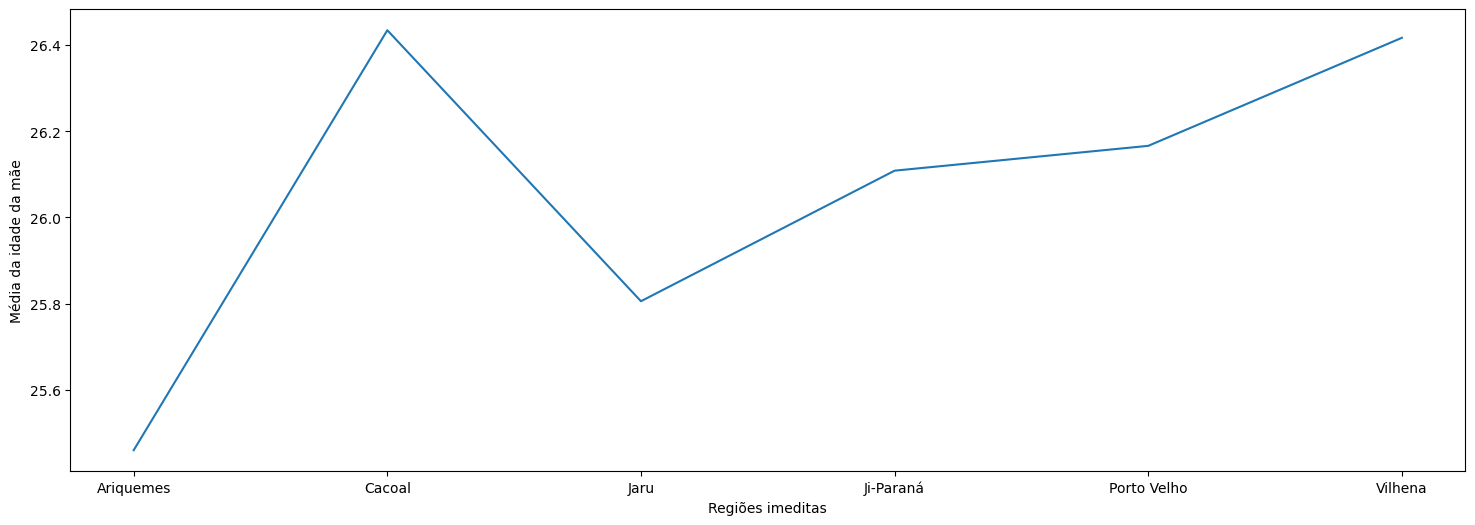

In [123]:
# plotando o resultado da média da idade da mãe por região imediata
idade_mae_imd.plot(figsize=[18,6])
plt.ylabel('Média da idade da mãe')
plt.xlabel('Regiões imeditas')

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [124]:
mapping_idh = {
    'Porto Velho': 0.736,
    'Vilhena': 0.731,
    'Cacoal': 0.718,
    'Ji-Paraná': 0.714,
    'Pimenta Bueno': 0.710,
    'Ariquemes': 0.702,
    'Rolim de Moura': 0.700,
    'Cerejeiras': 0.692,
    'Jaru': 0.689,
    'Colorado do Oeste': 0.685,
    'Ouro Preto do Oeste': 0.682,
    'Espigão d\'Oeste': 0.672,
    'Santa Luiza d\'Oeste': 0.670,
    'Pimenteiras do Oeste': 0.665,
    'Presidente Médici': 0.664,
    'Castanheiras': 0.658,
    'Guajará-Mirim': 0.657,
    'Chupinguaia': 0.652,
    'Cabixi': 0.650,
    'Candeias do Jamari': 0.649,
    'São Felipe d\'Oeste': 0.649,
    'Cacaulândia': 0.646,
    'São Miguel do Guaporé': 0.646,
    'Mirante da Serra': 0.643,
    'Alvorada d\'Oeste': 0.643,
    'Teixeirópolis': 0.643,
    'Nova Brasilândia d\'Oeste': 0.643,
    'Rio Crespo': 0.643,
    'Primavera de Rondônia': 0.641,
    'Alta Floresta d\'Oeste': 0.641,
    'Ministro Andreazza': 0.638,
    'Novo Horizonte do Oeste': 0.634,
    'Vale do Paraíso': 0.627,
    'Alto Paraíso': 0.625,
    'Parecis': 0.617,
    'Buritis': 0.616,
    'Itapuã do Oeste': 0.614,
    'Corumbiara': 0.613,
    'Cujubim': 0.612,
    'Costa Marques': 0.611,
    'São Francisco do Guaporé': 0.611,
    'Urupá': 0.609,
    'Monte Negro': 0.607,
    'Seringueiras': 0.598,
    'Governador Jorge Teixeira': 0.596,
    'Machadinho d\'Oeste': 0.596,
    'Campo Novo de Rondônia': 0.593,
    'Alto Alegre dos Parecis': 0.592,
    'Theobroma': 0.589,
    'Nova União': 0.587,
    'Nova Mamoré': 0.587,
    'Vale do Anari': 0.584
}

In [125]:
sinasc_raw.groupby(mapping_idh)['IDADEMAE'].agg(['sum', 'mean', 'median',
                                             'max', 'min'])

,sum,mean,median,max,min
munResNome,,,,,
0.584,2427,26.096774,26.0,44,14
0.587,13738,25.630597,25.0,46,14
0.589,2477,25.536082,24.0,42,15
0.592,3826,24.844156,25.0,41,14
0.593,4121,24.825301,25.0,40,13
0.596,2733,24.401786,24.0,41,13
0.598,4185,24.910714,24.0,42,14
0.607,5104,25.648241,25.0,40,14
0.609,4537,26.688235,27.0,43,15


In [126]:
sinasc_raw.groupby(mapping_idh)['CONSULTAS'].agg(['sum', 'mean', 'median',
                                             'max', 'min'])

,sum,mean,median,max,min
munResNome,,,,,
0.584,347,3.731183,4.0,4,1
0.587,1851,3.453358,4.0,9,1
0.589,360,3.711340,4.0,4,1
0.592,578,3.753247,4.0,4,1
0.593,616,3.710843,4.0,4,1
0.596,425,3.794643,4.0,4,1
0.598,640,3.809524,4.0,4,1
0.607,721,3.623116,4.0,4,1
0.609,642,3.776471,4.0,9,1


In [127]:
sinasc_raw.groupby(mapping_idh)['IDADEPAI'].agg(['sum', 'mean', 'median',
                                             'max', 'min'])

,sum,mean,median,max,min
munResNome,,,,,
0.584,510.0,34.000000,34.0,58.0,23.0
0.587,3432.0,31.486239,30.0,53.0,18.0
0.589,361.0,30.083333,28.5,45.0,23.0
0.592,3910.0,29.179104,28.0,50.0,16.0
0.593,915.0,30.500000,29.5,40.0,21.0
0.596,263.0,29.222222,28.0,37.0,22.0
0.598,1037.0,30.500000,29.0,47.0,20.0
0.607,971.0,34.678571,36.0,55.0,20.0
0.609,3473.0,31.008929,30.0,48.0,17.0


In [128]:
sinasc_raw.groupby(mapping_idh)['APGAR5'].agg(['sum', 'mean', 'median',
                                             'max', 'min'])

,sum,mean,median,max,min
munResNome,,,,,
0.584,832.0,8.946237,9.0,10.0,1.0
0.587,4990.0,9.327103,9.0,10.0,1.0
0.589,879.0,9.061856,9.0,10.0,8.0
0.592,1405.0,9.123377,9.0,10.0,1.0
0.593,1576.0,9.493976,10.0,10.0,4.0
0.596,1018.0,9.089286,9.0,10.0,6.0
0.598,1580.0,9.404762,10.0,10.0,6.0
0.607,1856.0,9.326633,9.0,10.0,5.0
0.609,1549.0,9.331325,9.0,10.0,6.0


### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [129]:
mapping_ifdm = {
    'Porto Velho': 0.7257,
    'Vilhena': 0.7465,
    'Cacoal': 0.7111,
    'Ji-Paraná': 0.7117,
    'Pimenta Bueno': 0.7383,
    'Ariquemes': 0.7746,
    'Rolim de Moura': 0.6785,
    'Cerejeiras': 0.6137,
    'Jaru': 0.6450,
    'Colorado do Oeste': 0.6473,
    'Ouro Preto do Oeste': 0.6261,
    'Espigão d\'Oeste': 0.5973,
    'Santa Luiza d\'Oeste': 0.6850,
    'Pimenteiras do Oeste': 0.6501,
    'Presidente Médici': 0.6140,
    'Castanheiras': 0.5430,
    'Guajará-Mirim': 0.5541,
    'Chupinguaia': 0.6766,
    'Cabixi': 0.5887,
    'Candeias do Jamari': 0.6199,
    'São Felipe d\'Oeste': 0.6153,
    'Cacaulândia': 0.5721,
    'São Miguel do Guaporé': 0.6699,
    'Mirante da Serra': 0.5519,
    'Alvorada d\'Oeste': 0.5919,
    'Teixeirópolis': 0.6500,
    'Nova Brasilândia d\'Oeste':0.5857,
    'Rio Crespo': 0.6430,
    'Primavera de Rondônia': 0.6384,
    'Alta Floresta d\'Oeste': 0.6337,
    'Ministro Andreazza': 0.5657,
    'Novo Horizonte do Oeste': 0.5858,
    'Vale do Paraíso': 0.5818,
    'Alto Paraíso': 0.5735,
    'Parecis': 0.5502,
    'Buritis': 0.6199,
    'Itapuã do Oeste': 0.5903,
    'Corumbiara': 0.5759,
    'Cujubim': 0.5055,
    'Costa Marques': 0.5626,
    'São Francisco do Guaporé': 0.6214,
    'Urupá': 0.6006,
    'Monte Negro': 0.6016,
    'Seringueiras': 0.5922,
    'Governador Jorge Teixeira': 0.4562,
    'Machadinho d\'Oeste': 0.5322,
    'Campo Novo de Rondônia': 0.5272,
    'Alto Alegre dos Parecis': 0.5046,
    'Theobroma': 0.5405,
    'Nova União': 0.5571,
    'Nova Mamoré': 0.5084,
    'Vale do Anari': 0.5710
}

In [137]:
sinasc_raw.groupby(mapping_ifdm)['IDADEMAE'].agg(['sum', 'mean', 'median',
                                             'max', 'min'])

,sum,mean,median,max,min
munResNome,,,,,
0.4562,2733,24.401786,24.0,41,13
0.5046,3826,24.844156,25.0,41,14
0.5055,5019,24.482927,23.0,42,14
0.5084,10941,25.326389,25.0,46,14
0.5272,4121,24.825301,25.0,40,13
0.5405,2477,25.536082,24.0,42,15
0.5430,873,27.281250,27.0,39,17
0.5502,1164,26.454545,26.0,41,16
0.5519,4314,26.304878,26.0,46,14


In [134]:
sinasc_raw.groupby(mapping_ifdm)['APGAR5'].agg(['sum', 'mean', 'median',
                                             'max', 'min'])

,sum,mean,median,max,min
munResNome,,,,,
0.4562,1018.0,9.089286,9.0,10.0,6.0
0.5046,1405.0,9.123377,9.0,10.0,1.0
0.5055,1877.0,9.156098,9.0,10.0,6.0
0.5084,4038.0,9.368910,9.0,10.0,6.0
0.5272,1576.0,9.493976,10.0,10.0,4.0
0.5405,879.0,9.061856,9.0,10.0,8.0
0.5430,289.0,9.031250,9.0,10.0,5.0
0.5502,399.0,9.068182,9.0,10.0,8.0
0.5519,1526.0,9.304878,9.0,10.0,5.0


In [138]:
sinasc_raw.groupby(mapping_ifdm)['CONSULTAS'].agg(['sum', 'mean', 'median',
                                             'max', 'min'])

,sum,mean,median,max,min
munResNome,,,,,
0.4562,425,3.794643,4.0,4,1
0.5046,578,3.753247,4.0,4,1
0.5055,746,3.639024,4.0,4,1
0.5084,1459,3.377315,4.0,9,1
0.5272,616,3.710843,4.0,4,1
0.5405,360,3.711340,4.0,4,1
0.5430,118,3.687500,4.0,4,2
0.5502,152,3.454545,4.0,4,1
0.5519,620,3.780488,4.0,4,1


In [139]:
sinasc_raw.groupby(mapping_ifdm)['IDADEPAI'].agg(['sum', 'mean', 'median',
                                             'max', 'min'])

,sum,mean,median,max,min
munResNome,,,,,
0.4562,263.0,29.222222,28.0,37.0,22.0
0.5046,3910.0,29.179104,28.0,50.0,16.0
0.5055,314.0,31.400000,34.5,44.0,19.0
0.5084,1236.0,31.692308,32.0,43.0,19.0
0.5272,915.0,30.500000,29.5,40.0,21.0
0.5405,361.0,30.083333,28.5,45.0,23.0
0.5430,851.0,30.392857,31.5,43.0,17.0
0.5502,1234.0,32.473684,32.0,61.0,18.0
0.5519,2701.0,32.154762,32.0,56.0,20.0


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [135]:
mapping_pib = {
    'Porto Velho': 17912070,
    'Vilhena': 2831175,
    'Cacoal': 2261644,
    'Ji-Paraná': 3783972,
    'Pimenta Bueno': 1164877,
    'Ariquemes': 2579830,
    'Rolim de Moura': 1283434,
    'Cerejeiras': 507000,
    'Jaru': 1500890,
    'Colorado do Oeste': 335000,
    'Ouro Preto do Oeste': 834000,
    'Espigão d\'Oeste': 625000,
    'Santa Luiza d\'Oeste': 135934,
    'Pimenteiras do Oeste': 76756,
    'Presidente Médici': 428000,
    'Castanheiras': 59779,
    'Guajará-Mirim': 893000,
    'Chupinguaia': 190331,
    'Cabixi': 113031,
    'Candeias do Jamari': 548000,
    'São Felipe d\'Oeste': 72084,
    'Cacaulândia': 116635,
    'São Miguel do Guaporé': 616000,
    'Mirante da Serra': 163955,
    'Alvorada d\'Oeste': 204098,
    'Teixeirópolis': 72089,
    'Nova Brasilândia d\'Oeste':360000,
    'Rio Crespo': 76854,
    'Primavera de Rondônia': 52908,
    'Alta Floresta d\'Oeste': 496000,
    'Ministro Andreazza': 174633,
    'Novo Horizonte do Oeste': 129399,
    'Vale do Paraíso': 116742,
    'Alto Paraíso': 358000,
    'Parecis': 80759,
    'Buritis': 726000,
    'Itapuã do Oeste': 129351,
    'Corumbiara': 188218,
    'Cujubim': 385000,
    'Costa Marques': 171878,
    'São Francisco do Guaporé': 353000,
    'Urupá': 172143,
    'Monte Negro': 219152,
    'Seringueiras': 169429,
    'Governador Jorge Teixeira': 148027,
    'Machadinho d\'Oeste': 633000,
    'Campo Novo de Rondônia': 208821,
    'Alto Alegre dos Parecis': 213410,
    'Theobroma': 140601,
    'Nova União': 92346,
    'Nova Mamoré': 529000,
    'Vale do Anari': 105208
}

In [140]:
sinasc_raw.groupby(mapping_pib)['IDADEMAE'].agg(['sum', 'mean', 'median',
                                             'max', 'min'])

,sum,mean,median,max,min
munResNome,,,,,
52908.0,1162,27.023256,26.0,39,16
59779.0,873,27.281250,27.0,39,17
72089.0,1666,26.031250,26.0,39,16
76756.0,1003,25.075000,25.0,40,14
76854.0,1333,26.660000,26.5,39,16
80759.0,1164,26.454545,26.0,41,16
92346.0,2797,26.894231,26.5,39,16
105208.0,2427,26.096774,26.0,44,14
113031.0,2083,26.037500,26.0,39,13


In [141]:
sinasc_raw.groupby(mapping_pib)['CONSULTAS'].agg(['sum', 'mean', 'median',
                                             'max', 'min'])

,sum,mean,median,max,min
munResNome,,,,,
52908.0,164,3.813953,4.0,4,2
59779.0,118,3.687500,4.0,4,2
72089.0,248,3.875000,4.0,4,1
76756.0,144,3.600000,4.0,4,1
76854.0,184,3.680000,4.0,4,2
80759.0,152,3.454545,4.0,4,1
92346.0,392,3.769231,4.0,4,1
105208.0,347,3.731183,4.0,4,1
113031.0,310,3.875000,4.0,4,2


In [142]:
sinasc_raw.groupby(mapping_pib)['APGAR5'].agg(['sum', 'mean', 'median',
                                             'max', 'min'])

,sum,mean,median,max,min
munResNome,,,,,
52908.0,385.0,8.953488,9.0,10.0,0.0
59779.0,289.0,9.031250,9.0,10.0,5.0
72089.0,578.0,9.031250,9.0,10.0,7.0
76756.0,365.0,9.125000,9.0,10.0,8.0
76854.0,461.0,9.220000,9.0,10.0,6.0
80759.0,399.0,9.068182,9.0,10.0,8.0
92346.0,952.0,9.153846,9.0,10.0,1.0
105208.0,832.0,8.946237,9.0,10.0,1.0
113031.0,730.0,9.125000,9.0,10.0,8.0


In [143]:
sinasc_raw.groupby(mapping_pib)['IDADEPAI'].agg(['sum', 'mean', 'median',
                                             'max', 'min'])

,sum,mean,median,max,min
munResNome,,,,,
52908.0,1148.0,31.888889,33.0,44.0,21.0
59779.0,851.0,30.392857,31.5,43.0,17.0
72089.0,1386.0,31.500000,29.5,67.0,20.0
76756.0,178.0,35.600000,36.0,45.0,25.0
76854.0,28.0,28.000000,28.0,28.0,28.0
80759.0,1234.0,32.473684,32.0,61.0,18.0
92346.0,2196.0,31.371429,30.0,53.0,18.0
105208.0,510.0,34.000000,34.0,58.0,23.0
113031.0,206.0,34.333333,35.5,47.0,19.0


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

Ao analisar os dados que julguei relevante para os agrupamentos, notei que entre todos os municipios independente de suas respectivas classificações de idh, ifdm ou pib, há um equilibrio entre a média de todos os dados. Interessante notar que o número médio de consultas é o mesmo independente do idh da região. 